/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.12/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Поколение 0: x1=2.977, x2=3.627, f=1.348
Поколение 1: x1=2.977, x2=3.627, f=1.348
Поколение 2: x1=1.003, x2=3.280, f=1.073
Поколение 3: x1=1.055, x2=2.555, f=1.091
Поколение 4: x1=2.148, x2=3.454, f=0.228
Поколение 5: x1=1.661, x2=3.003, f=0.115
Поколение 6: x1=1.804, x2=3.034, f=0.040
Поколение 7: x1=1.899, x2=2.948, f=0.013
Поколение 8: x1=1.899, x2=2.948, f=0.013
Поколение 9: x1=2.031, x2=3.038, f=0.002
Поколение 10: x1=1.981, x2=2.987, f=0.001
Поколение 11: x1=1.981, x2=2.987, f=0.001
Поколение 12: x1=1.999, x2=3.008, f=0.000
Поколение 13: x1=1.995, x2=2.998, f=0.000
Поколение 14: x1=1.999, x2=2.995, f=0.000
Поколение 15: x1=2.000, x2=3.000, f=0.000
Поколение 16: x1=2.000, x2=3.001, f=0.000
Поколение 17: x1=2.001, x2=3.001, f=0.000
Поколение 18: x1=2.001, x2=3.000, f=0.000
Поколение 19: x1=2.000, x2=3.000, f=0.000
Поколение 20: x1=2.000, x2=3.000, f=0.000
Поколение 21: x1=2.000, x2=3.000, f=0.000
Поколение 22: x1=2.000, x2=3.000, f=0.000
Поколение 23: x1=2.000, x2=3.000, f=0.000
По

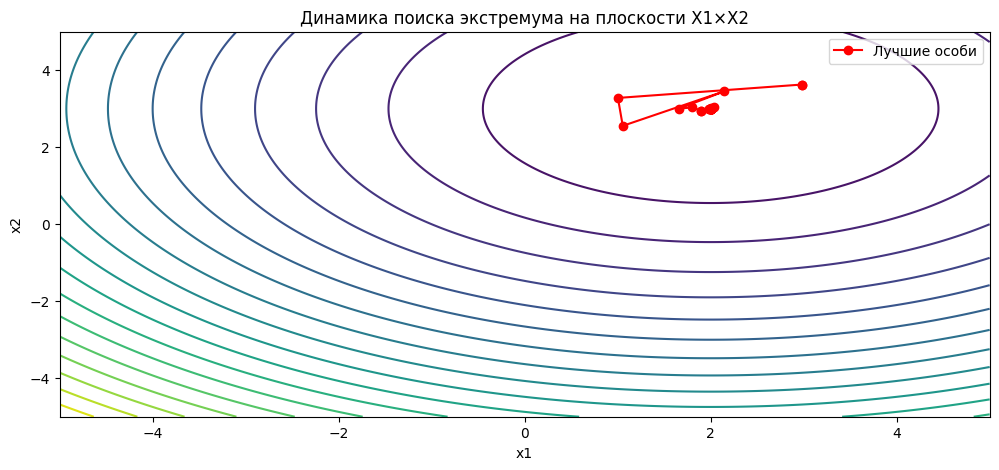

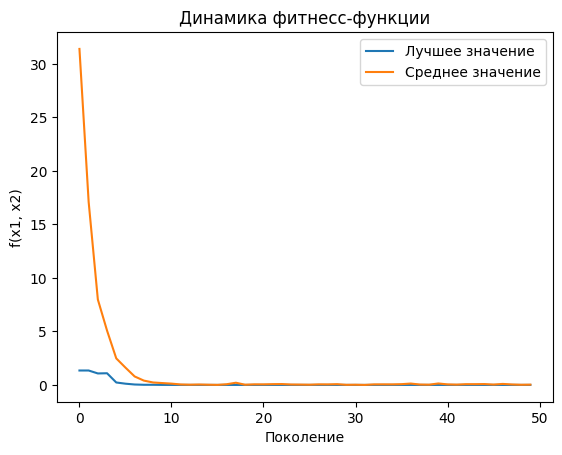

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools

# Параметры задачи
X1_MIN, X1_MAX = -5, 5
X2_MIN, X2_MAX = -5, 5

POP_SIZE = 30
CXPB = 0.8
MUTPB = 0.2
NGEN = 50

# Функция двух переменных (пример)
def f(x1, x2):
    return x1**2 + x2**2 - 4*x1 - 6*x2 + 13  # минимум в (2,3)

# Фитнесс-функция (минимизация)
def fitness_function(ind):
    x1, x2 = ind
    return (f(x1, x2),)

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float_x1", random.uniform, X1_MIN, X1_MAX)
toolbox.register("attr_float_x2", random.uniform, X2_MIN, X2_MAX)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float_x1, toolbox.attr_float_x2), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)  # однородный кроссинговер
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.5)
toolbox.register("select", tools.selTournament, tournsize=3)

# Инициализация
population = toolbox.population(n=POP_SIZE)
best_history = []
avg_history = []
positions_history = []

for gen in range(NGEN):
    # Оценка фитнеса
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    fits = [ind.fitness.values[0] for ind in population]
    best_history.append(min(fits))
    avg_history.append(np.mean(fits))

    best_ind = tools.selBest(population, 1)[0]
    positions_history.append(best_ind[:])
    print(f"Поколение {gen}: x1={best_ind[0]:.3f}, x2={best_ind[1]:.3f}, f={best_ind.fitness.values[0]:.3f}")

    # Селекция
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))

    # Кроссинговер
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    # Мутация
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    population[:] = offspring

# Визуализация линий уровня и движения особей
x1_vals = np.linspace(X1_MIN, X1_MAX, 200)
x2_vals = np.linspace(X2_MIN, X2_MAX, 200)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f(X1, X2)

plt.figure(figsize=(12,5))
plt.contour(X1, X2, Z, 20, cmap='viridis')
positions = np.array(positions_history)
plt.plot(positions[:,0], positions[:,1], 'ro-', label='Лучшие особи')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Динамика поиска экстремума на плоскости X1×X2')
plt.legend()
plt.show()

# График фитнесс-функции
plt.plot(best_history, label='Лучшее значение')
plt.plot(avg_history, label='Среднее значение')
plt.xlabel('Поколение')
plt.ylabel('f(x1, x2)')
plt.title('Динамика фитнесс-функции')
plt.legend()
plt.show()
